In [1]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
# from nltk.stem.porter import PorterStemmer
# from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the Dataset
df = pd.read_csv('taylor_swift_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206


In [3]:
# Check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1265 non-null   int64  
 1   name              1265 non-null   object 
 2   album             1265 non-null   object 
 3   release_date      1265 non-null   object 
 4   track_number      1265 non-null   int64  
 5   id                1265 non-null   object 
 6   uri               1265 non-null   object 
 7   acousticness      1265 non-null   float64
 8   danceability      1265 non-null   float64
 9   energy            1265 non-null   float64
 10  instrumentalness  1265 non-null   float64
 11  liveness          1265 non-null   float64
 12  loudness          1265 non-null   float64
 13  speechiness       1265 non-null   float64
 14  tempo             1265 non-null   float64
 15  valence           1265 non-null   float64
 16  popularity        1265 non-null   int64  


In [4]:
# Find if missing value is exists in dataset

df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [5]:
# Change type string of column release_date to date
df ['release_date'] = pd.to_datetime(df['release_date'])

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'], format= '%Y%M%d')

In [7]:
# Change type string of column release_date to date
# df['release_date'] = df['release_date'].replace('/','-')

In [8]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206


In [9]:
# Change type string of column release_date to date
df['release_date'] = pd.to_datetime(df['release_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1265 non-null   int64         
 1   name              1265 non-null   object        
 2   album             1265 non-null   object        
 3   release_date      1265 non-null   datetime64[ns]
 4   track_number      1265 non-null   int64         
 5   id                1265 non-null   object        
 6   uri               1265 non-null   object        
 7   acousticness      1265 non-null   float64       
 8   danceability      1265 non-null   float64       
 9   energy            1265 non-null   float64       
 10  instrumentalness  1265 non-null   float64       
 11  liveness          1265 non-null   float64       
 12  loudness          1265 non-null   float64       
 13  speechiness       1265 non-null   float64       
 14  tempo             1265 n

In [11]:
# Separate Year within column release_date
df['release_year'] = df['release_date'].dt.year

In [12]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395,2022
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270,2022
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690,2022
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124,2022
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206,2022


In [13]:
df["duration"]=df["duration_ms"].apply(lambda x:round(x/1000))
df.drop("duration_ms",inplace=True,axis=1)

In [14]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,release_year,duration
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,2022,202
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,2022,218
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,2022,201
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,2022,256
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,2022,194


In [15]:
# Figurer out the correlations between all columns using heatmap

# plt.figure(figsize=(16,8))
# sns.set(style="whitegrid")
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap= "YlGnBu")

<Axes: >

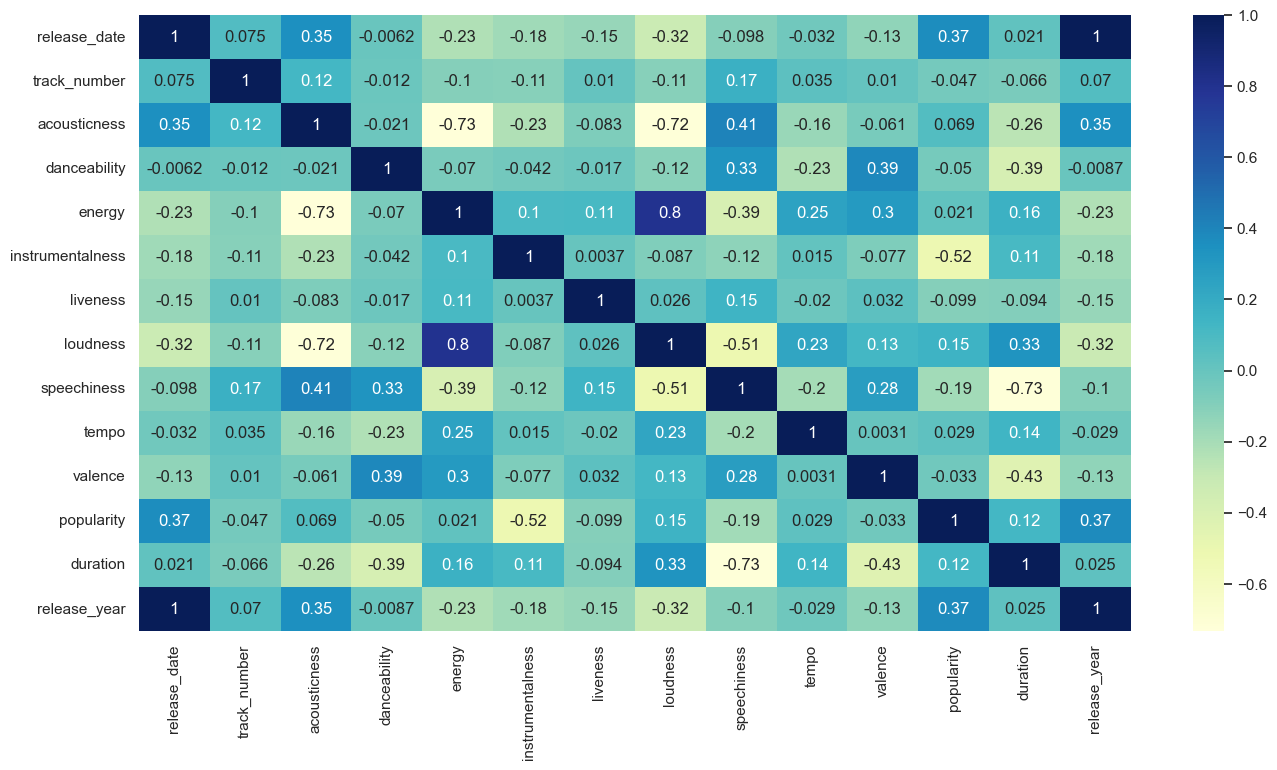

In [16]:
# Figurer out the correlations between all columns using heatmap

plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
corr = df[['release_date', 'track_number','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','popularity','duration','release_year']].corr()
sns.heatmap(corr, annot=True, cmap= "YlGnBu")

Dari table correlation kita mendapatkan informasi terkait attributes yang ada pada dataset, yaitu:

1. popularity dari lagu-lagu Mbak Taylor sangat berkorelasi dengan release_year dan release_date (release year hasil split dari release_date)
2. lagu-lagu yang populer memiliki tingkat loudness yang cukup tinggi dari pada atribut lainnya
3. energy sangat berkorelasi dengan loudness, tidak heran jika semakin energetic lagu maka semakin keras suaranya
4. duration memiliki korelasi tinggi dengan loudness, lagu-lagu yang memiliki loudness tinggi maka memiliki durasi lebih lama dari pada lagu lainnya

Text(0.5, 0, 'year')

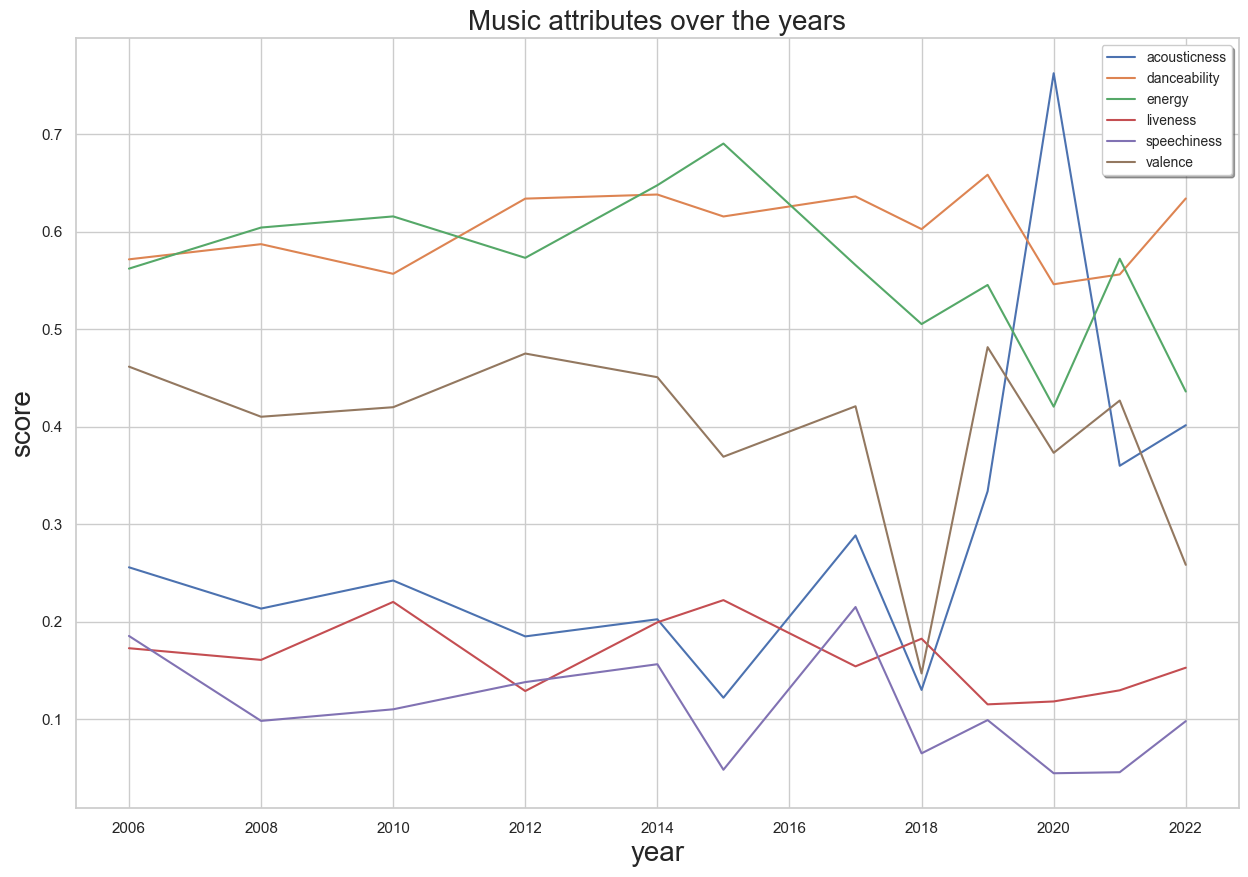

In [17]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
target_cols = ['acousticness','danceability','energy','liveness','speechiness','valence']
for c in target_cols:
    x = df.groupby('release_year')[c].mean()
    ax = sns.lineplot(x=x.index, y=x, label=c)

ax.set_title('Music attributes over the years', fontsize=20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 10}, loc='upper right')
ax.set_ylabel('score', fontsize=20)
ax.set_xlabel('year', fontsize=20)


Seperti yang terlihat pada gambar diatas, lagu-lagunya Mbak Taylor pada tahun 2020 memiliki accousticness lebih tinggi dari tahun lainnya. Pada tahun 2020 Mbak Taylor me*release* album Folklore, album ini juga menghantarkan Mbak Taylor menjadi wanita pertama dalam sejarah yang memenangkan Album Of The Year sebanyak 3 kali. Jadi tidak heran jika ada istilah bahwa Mbak Taylor merupakan industri musik saat ini. Berbagai nominasi dan awards juga didapatkan karena album Folklore.

Text(0.5, 0, 'Year')

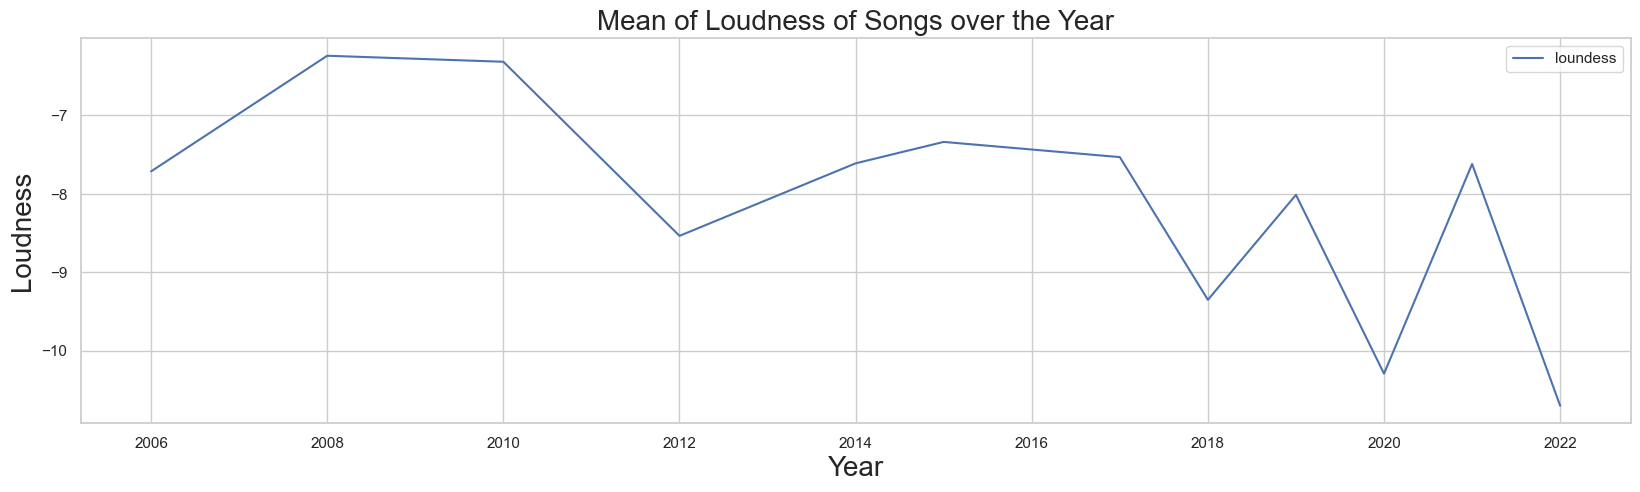

In [18]:
plt.figure(figsize=(20, 5))
# mean loudness over year
x = df.groupby('release_year')["loudness"].mean()
ax = sns.lineplot(x=x.index, y=x, label="loundess")

# set axis label and titles
ax.set_title('Mean of Loudness of Songs over the Year', fontsize=20)
ax.set_ylabel('Loudness', fontsize=20)
ax.set_xlabel('Year', fontsize=20)


Text(0.5, 0, 'song title')

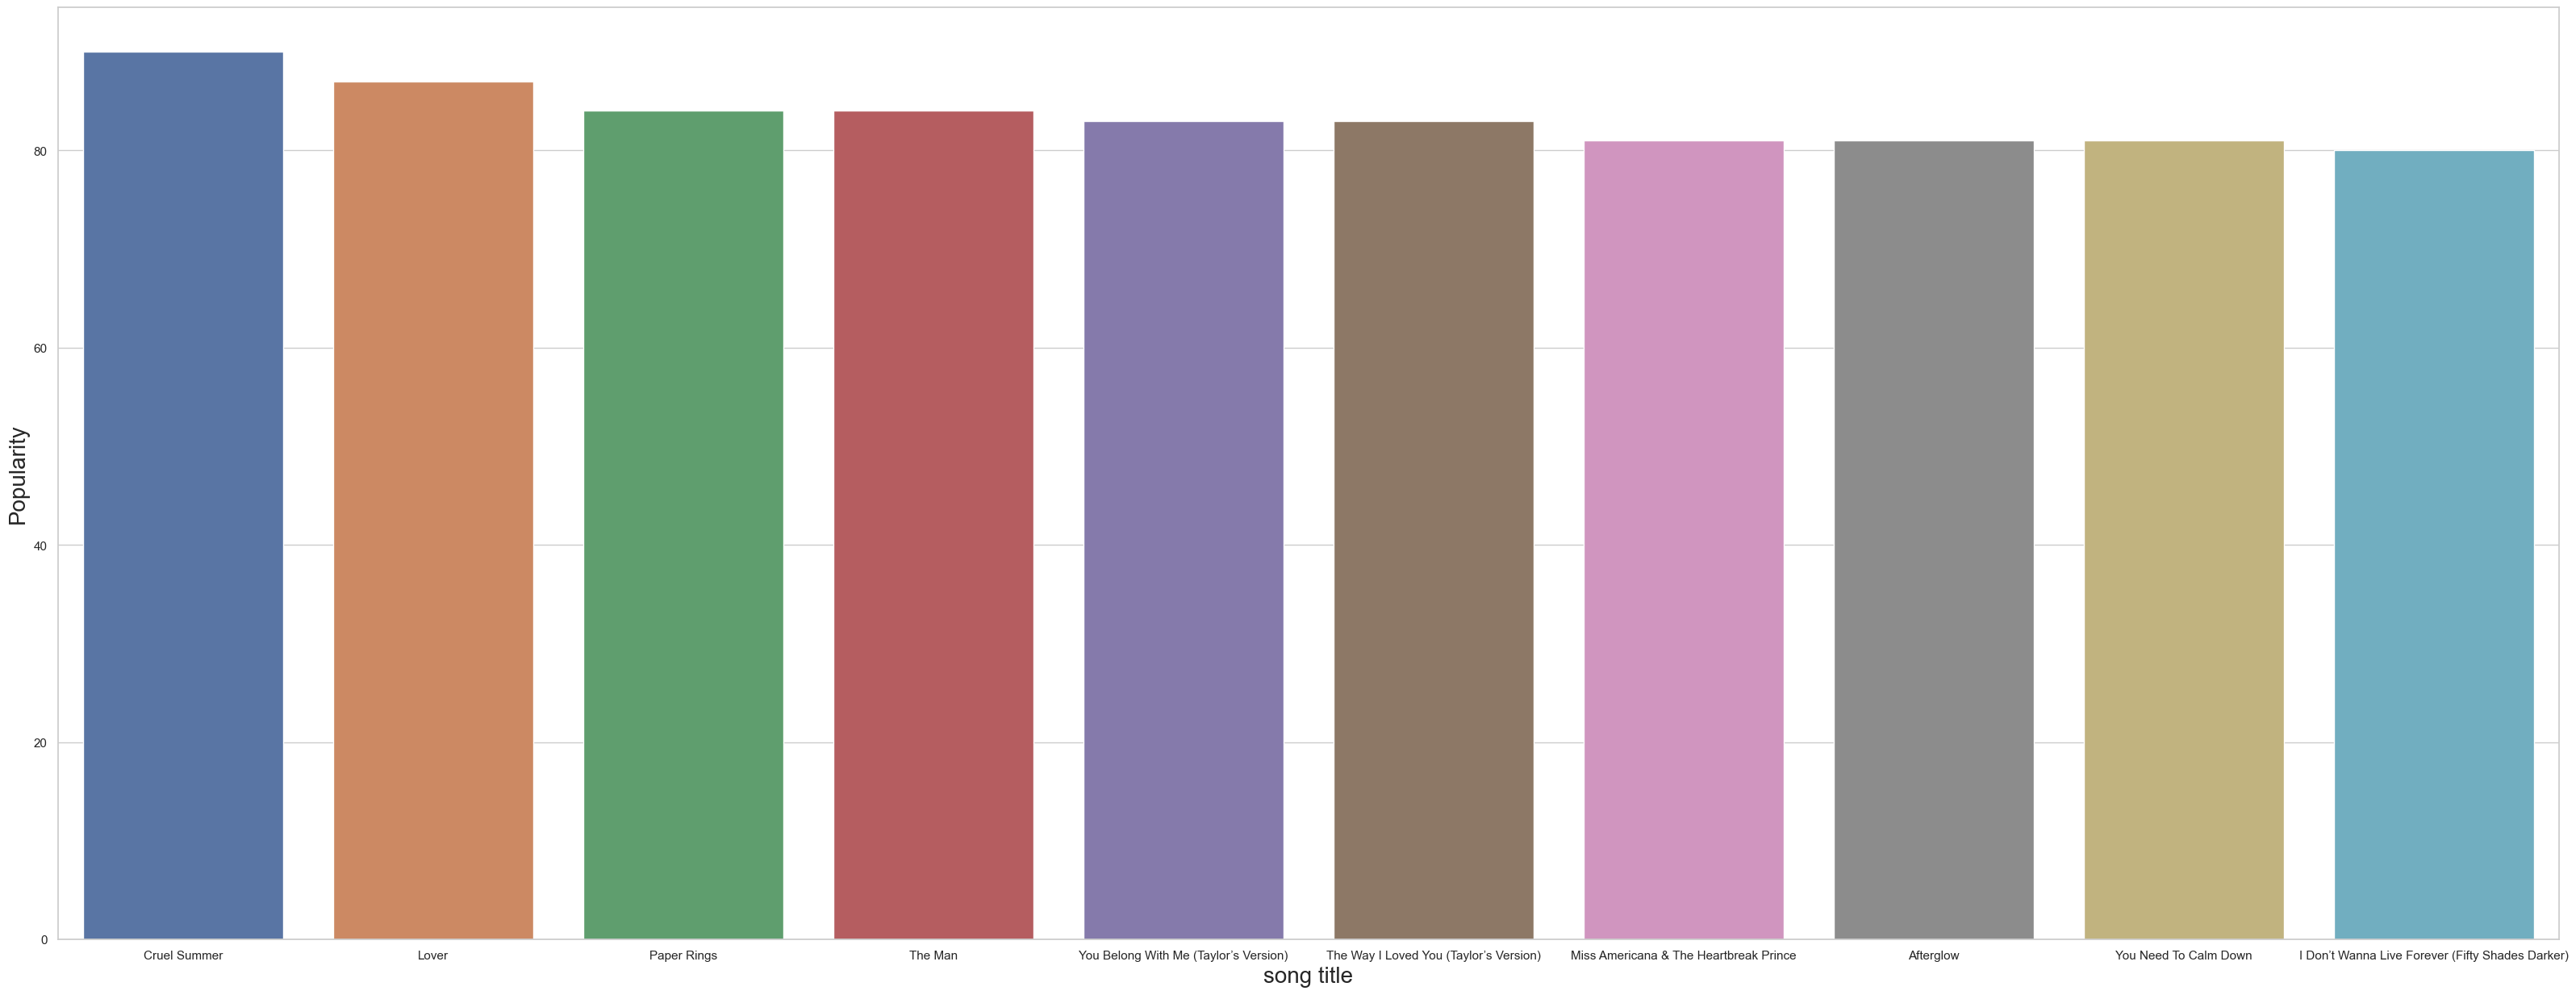

In [19]:
plt.figure(figsize=(40, 15))
sns.set(style="whitegrid")

# group by the song's name and rank them base on their popularity
x = df.groupby("name")["popularity"].mean(
).sort_values(ascending=False).head(10)
axis = sns.barplot(x=x.index, y=x)

axis.set_ylabel('Popularity', fontsize=20)
axis.set_xlabel('song title', fontsize=20)


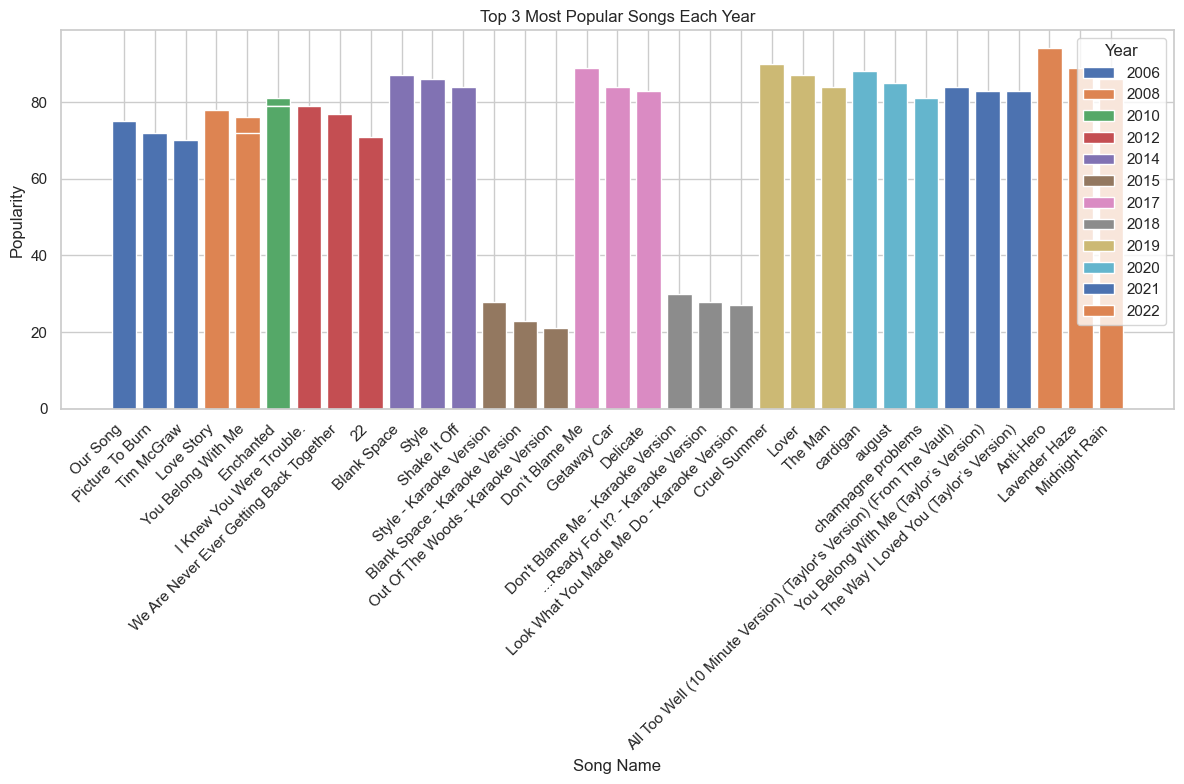

In [20]:
top_songs_per_year = df.groupby('release_year').apply(
    lambda group: group.nlargest(3, 'popularity')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))
for year, year_data in top_songs_per_year.groupby('release_year'):
    plt.bar(year_data['name'], year_data['popularity'], label=year)

plt.xlabel('Song Name')
plt.ylabel('Popularity')
plt.title('Top 3 Most Popular Songs Each Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()

plt.show()


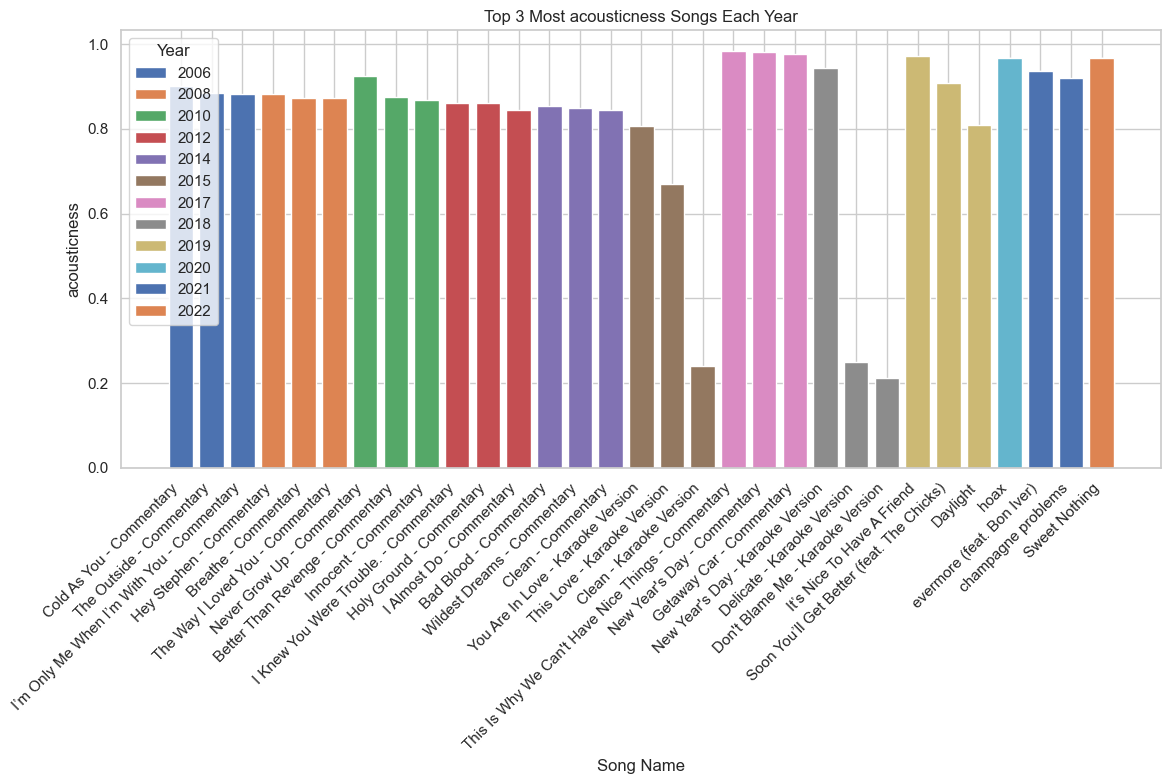

In [21]:
top_songs_per_year = df.groupby('release_year').apply(
    lambda group: group.nlargest(3, 'acousticness')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))
for year, year_data in top_songs_per_year.groupby('release_year'):
    plt.bar(year_data['name'], year_data['acousticness'], label=year)

plt.xlabel('Song Name')
plt.ylabel('acousticness')
plt.title('Top 3 Most acousticness Songs Each Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()

plt.show()


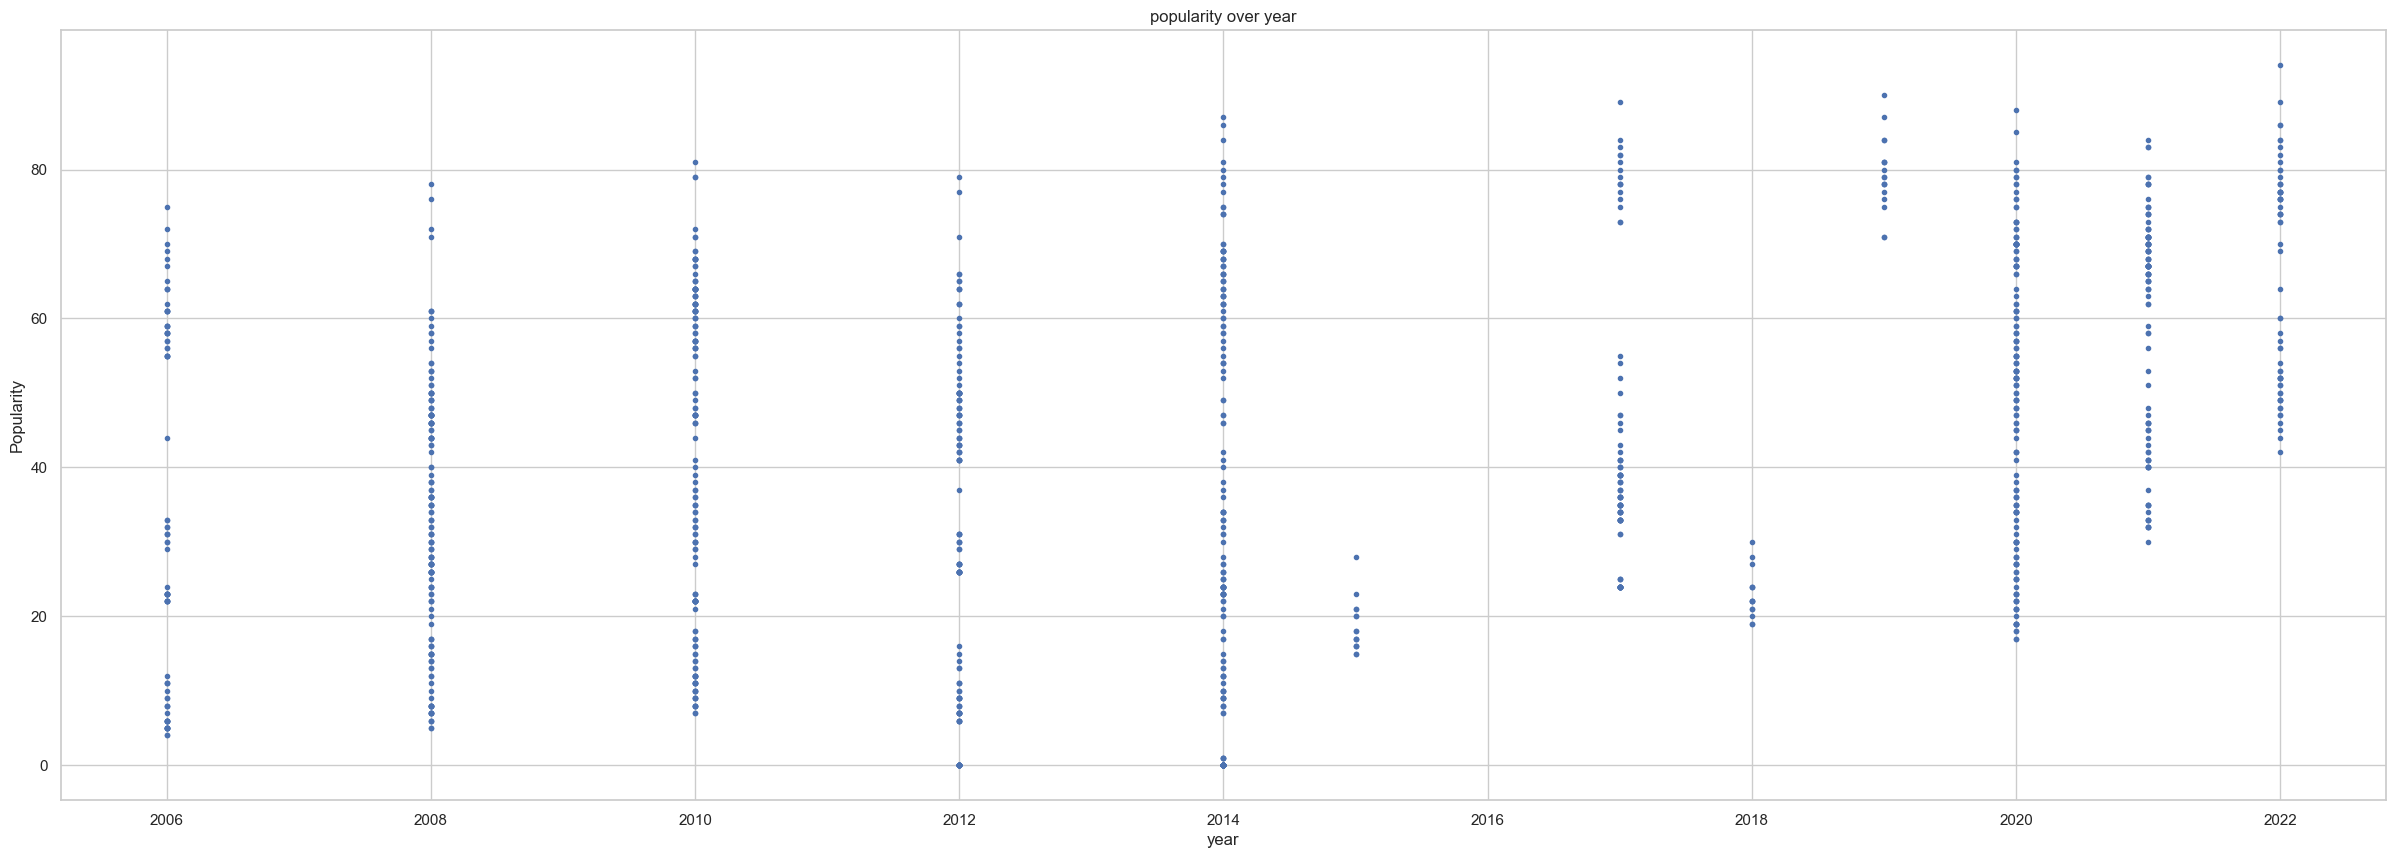

In [22]:
plt.figure(figsize=(30, 10))

xs = df["release_year"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('year')
plt.title("popularity over year")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean year for song popularity')

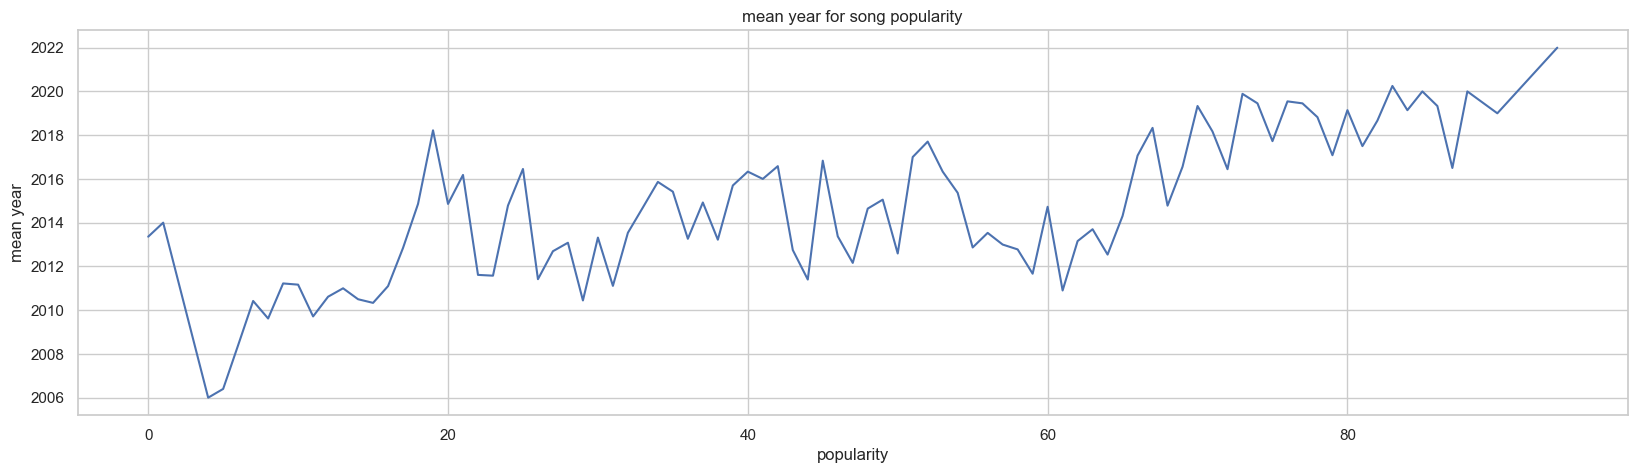

In [23]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["release_year"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean year')
axis.set_xlabel('popularity')
axis.set_title("mean year for song popularity")


We can see that a newly released song has a higher likelihood of being popular; which makes total sense. Newer songs have a higher chance of being heard, and the dataset also calculates popularity base on the current time of stream. So it is reasonable that people listens to newer songs.

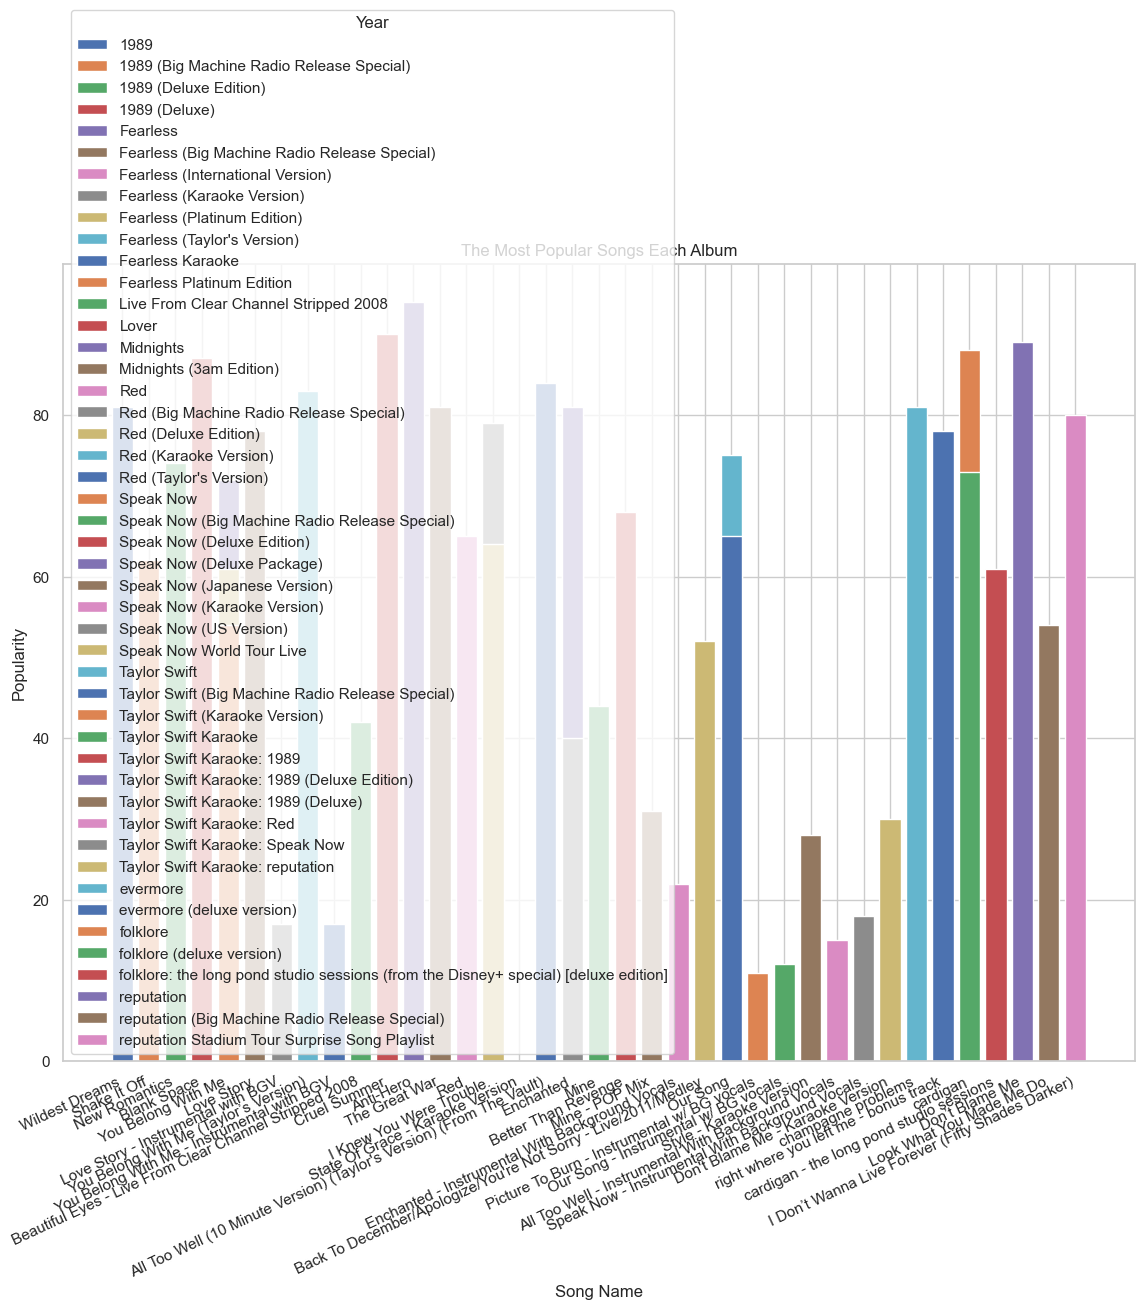

In [24]:
top_songs_per_album = df.groupby('album').apply(
    lambda group: group.nlargest(1, 'popularity')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 12))
for year, year_data in top_songs_per_album.groupby('album'):
    plt.bar(year_data['name'], year_data['popularity'], label=year)

plt.xlabel('Song Name')
plt.ylabel('Popularity')
plt.title('The Most Popular Songs Each Album')
plt.xticks(rotation=25, ha='right')
plt.legend(title='Year')
plt.tight_layout()

plt.show()
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

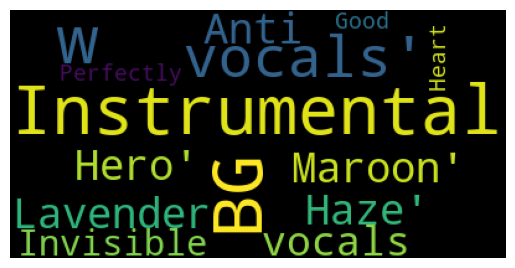

In [25]:
worldcloud_song_name = df['name'].values

wordcloud = WordCloud().generate(str(worldcloud_song_name))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


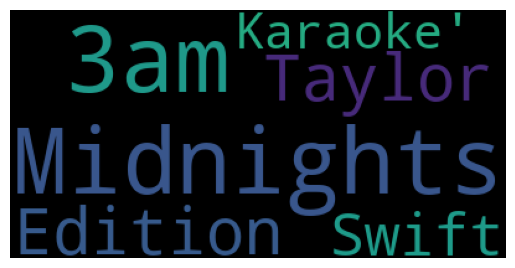

In [26]:
worldcloud_album = df['album'].values

wordcloud = WordCloud().generate(str(worldcloud_album))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [32]:
album_groupby = df['album'].values
album_groupby

array(['Midnights (3am Edition)', 'Midnights (3am Edition)',
       'Midnights (3am Edition)', ..., 'Taylor Swift Karaoke',
       'Taylor Swift Karaoke', 'Taylor Swift Karaoke'], dtype=object)